<span style="font-family:Times New Roman; font-size:15px;">

# Analiza podatkov

Avtorica: Neža Zupančič

Podatki, ki so bili uporabljeni v projektni nalogi, so bili pridobljeni iz spletne strani: [Basketball reference](https://www.basketball-reference.com/).

Gre za statistične podatke igralcev lige NBA, ki zajemajo zadnjih 25 let. Podatki predstavljajo povprečne sezonske dosežke posameznik igralcev. 

</span>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv("pridobivanje_podatkov/podatki.csv")

tabela_podatkov = tabela_podatkov.rename(columns={
    "Player": "Igralec",
    "Team": "Ekipa",
    "Age": "Starost",
    "Awards": "Nagrada",
    "Year": "Leto",
    "Pos": "Poz"
}) 

<span style="font-family:Times New Roman; font-size:15px;">

## 1. Tabela podatkov

Za začetek si oglejmo tabelo podatkov.

</span>

In [95]:
tabela_podatkov

,Rk,Igralec,Starost,Ekipa,Poz,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Nagrada,Leto
0,1,Shaquille O'Neal,27,LAL,C,79,79,40.0,12.1,21.1,...,9.4,13.6,3.8,0.5,3.0,2.8,3.2,29.7,"MVP-1,DPOY-2,AS,NBA1,DEF2",2000
1,2,Allen Iverson,24,PHI,SG,70,70,40.8,10.4,24.8,...,2.8,3.8,4.7,2.1,0.1,3.3,2.3,28.4,"MVP-7,AS,NBA2",2000
2,3,Grant Hill,27,DET,SF,74,74,37.5,9.4,19.2,...,5.3,6.6,5.2,1.4,0.6,3.2,2.6,25.8,"MVP-8,AS,NBA2",2000
3,4,Vince Carter,23,TOR,SF,82,82,38.1,9.6,20.7,...,4.0,5.8,3.9,1.3,1.1,2.2,3.2,25.7,"MVP-10,AS,NBA3",2000
4,5,Karl Malone,36,UTA,PF,82,82,35.9,9.2,18.0,...,7.4,9.5,3.7,1.0,0.9,2.8,2.8,25.5,"MVP-4,AS,NBA2",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,568,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,...,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,NaN,2024
15154,569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,2024
15155,570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
15156,571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024


<span style="font-family:Times New Roman; font-size:15px;">

## 2. Povprečno število točk igralcev

### 2.1. Povprečje vseh igralcev skozi sezone

Najprej sem analizirala povprečno število doseženih točk vseh igralcev v zadnjih 25 sezonah. Zanimalo me je, v katerem letu je bilo to povprečje najvišje in v katerem najnižje.

</span>



In [96]:
povprečje = tabela_podatkov.groupby("Leto")["PTS"].mean()
najboljše_leto = povprečje.idxmax()
najslabše_leto = povprečje.idxmin()

print(f"Najboljše leto: {najboljše_leto}")
print(f"Najslabše leto: {najslabše_leto}")

Najboljše leto: 2023
Najslabše leto: 2004


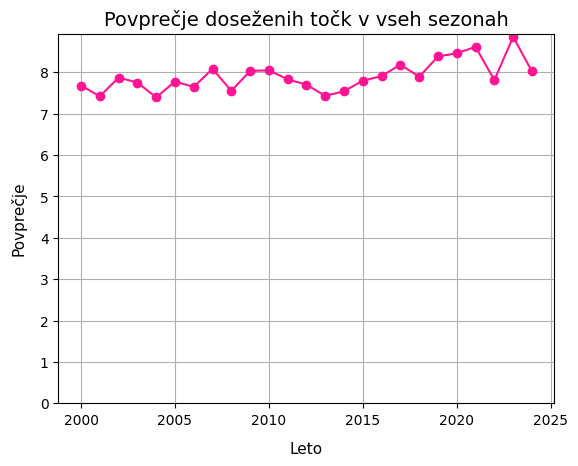

In [97]:
povprečje.plot(x="Leto", y="mean", kind="line", legend=False, marker="o", color="deeppink")
plt.ylim(0)
plt.title("Povprečje doseženih točk v vseh sezonah", fontsize=14)
plt.xlabel("Leto",fontsize=11, labelpad=10)
plt.ylabel("Povprečje",fontsize=11, labelpad=10)
plt.grid()
plt.show()

<span style="font-family:Times New Roman; font-size:15px;">

### 2.2. Najboljših deset igralcev

V nadaljevanju me je zanimalo povprečno število doseženih točk najboljših desetih igralcev v posamezni sezoni. Posebej sem želela preveriti, ali se dinamika tega povprečja razlikuje oziroma povezuje s povprečjem vseh igralcev skupaj.

</span>

In [98]:
top10_igralcev = (
    tabela_podatkov.sort_values(["Leto", "PTS"], ascending=[True, False])
    .groupby("Leto", group_keys=False)
    .head(10)
    .reset_index()
)

In [99]:
povprečje_top10 = (
    top10_igralcev
    .groupby("Leto")["PTS"]
    .mean()
)
povprečje_top10

Leto
2000    25.35
2001    27.37
2002    25.74
2003    26.20
2004    24.05
2005    26.54
2006    28.67
2007    27.94
2008    25.28
2009    25.57
2010    26.33
2011    25.67
2012    24.27
2013    24.77
2014    25.47
2015    24.84
2016    25.90
2017    27.86
2018    26.81
2019    27.91
2020    29.10
2021    28.46
2022    28.73
2023    30.74
2024    29.21
Name: PTS, dtype: float64

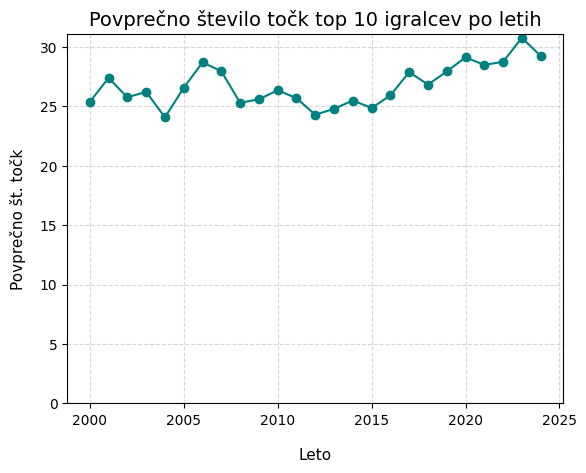

In [100]:
povprečje_top10.plot(x="Leto", y="mean", kind="line", color="teal", marker="o")
plt.ylim(0)
plt.title("Povprečno število točk top 10 igralcev po letih", fontsize=14)
plt.xlabel("Leto", fontsize=11, labelpad=15)
plt.ylabel("Povprečno št. točk", fontsize=11, labelpad=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<span style="font-family:Times New Roman; font-size:15px;">

## Ugotovitve

Prvi graf prikazuje povprečno število doseženih točk vseh igralcev v zadnjih 25 sezonah. Vrednosti se gibljejo med 7.4 in 8.9 točkami, brez izrazitih nihanj. Izjema so zadnja tri leta (2021 - 2023), ko je povprečje najprej občutno padlo, nato pa ponovno naraslo. Najvišja vrednost je bila dosežena leta 2023, najnižja pa leta 2000.

Drugi graf prikazuje povprečje najboljših desetih igralcev v posamezni sezoni. Tu se vrednosti gibljejo med 24 in 33 točkami. V prvih desetih sezonah so bila nihanja večja, kasneje pa je povprečje postopoma in enakomerno naraščalo. 

Primerjava obeh grafov kaže, da povprečje vseh igralcev in povprečje najboljših desetih igralcev med seboj nista neposredno povezana in eno ne drugo ne vplivata.

</span>

<span style="font-family:Times New Roman; font-size:15px;">

## 3. Povprečna starost najbolših deset igralcev

V tem delu analize sem se osredotočila na povprečno starost desetih najboljših igralcev v posamezni sezoni. Zanimalo me je, ali se ta starost skozi čas zmanjšuje, ter v katerih letih je bila povprečna starost najvišja oziroma najnižja.

</span>


In [101]:
top10_točke = (
    tabela_podatkov.sort_values(["Leto", "PTS"], ascending=[True, False])
    .groupby("Leto", group_keys=False)[["Leto", "Starost", "PTS"]]
    .head(10)
    .reset_index()
)

In [102]:
povprečna_starost_top10 = (
    top10_točke.groupby("Leto")["Starost"].mean()
)

print(povprečna_starost_top10)
najstarejši = povprečna_starost_top10.idxmax()
najmlajši = povprečna_starost_top10.idxmin()

print(f"Najnižja povprečna starost igralcev nastopi v letu {najmlajši}.")
print(f"Najvišja povprečna starost igralcev nastopi v letu {najstarejši}.")


Leto
2000    26.5
2001    24.3
2002    25.4
2003    26.1
2004    26.2
2005    25.2
2006    25.8
2007    27.2
2008    26.6
2009    25.2
2010    26.3
2011    26.2
2012    26.1
2013    26.3
2014    25.6
2015    27.3
2016    26.1
2017    26.7
2018    27.0
2019    27.3
2020    26.0
2021    26.7
2022    27.8
2023    29.9
2024    27.4
Name: Starost, dtype: float64
Najnižja povprečna starost igralcev nastopi v letu 2001.
Najvišja povprečna starost igralcev nastopi v letu 2023.


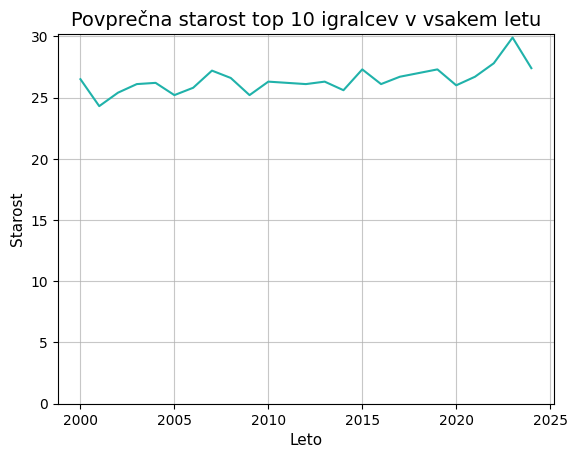

In [103]:
povprečna_starost_top10.plot(x="Leto", y="mean", kind="line", color="lightseagreen")
plt.title("Povprečna starost top 10 igralcev v vsakem letu", fontsize=14)
plt.xlabel("Leto", fontsize=11)
plt.ylabel("Starost", fontsize=11)
plt.ylim(0)
plt.grid(True, alpha=0.7)
plt.show()

<span style="font-family:Times New Roman; font-size:15px;">

### Ugotovitve 

Na podlagi grafa lahko opazimo, da se povprečna starost desetih najboljših igralcev v posameznem letu nekoliko povečuje. Povprečna starost se giblje med približno 24 in 30 let, pri čemer je najvišjo vrednost dosegla leta 2023. Najnižja povprečna starost je bila zabeležena leta 2001. 

Sicer povprečje skozi leta ostaja razmeroma stabilno, z nekaj odstopanj na začetku in koncu obdobja. Od leta 2020 povprečna starost naraste z okoli 26 na 30 let, kar je lahko posledica prisotnosti izjemnih košarkarskih legend, ki še niso zaključile kariero. 

</span>

<span style="font-family:Times New Roman; font-size:15px;">

## 4. Učinkovitost igralcev

### 4. 1. Delež doseženih točk

V tej analizi sem želela raziskati učinkovitost igralcev glede na število doseženih točk na minuto igre ter ugotoviti, kateri igralci se pri tem izkazujejo kot najbolj uspešni.

</span>

In [104]:
tabela_podatkov["točke_na_minuto"] = tabela_podatkov["PTS"] / tabela_podatkov["MP"]

top10_igralcev = (
    tabela_podatkov.sort_values(["Leto", "PTS"], ascending=[True, False])
    .groupby("Leto", group_keys=False)[["Leto", "PTS", "točke_na_minuto"]]
    .head(10)
    .reset_index()
)

In [105]:
povprečna_učinkovitost = (
    top10_igralcev.groupby("Leto")["točke_na_minuto"]
    .mean()
    .reset_index(name="Povprečna učinkovitost na minuto")
)

povprečna_učinkovitost

,Leto,Povprečna učinkovitost na minuto
0,2000,0.651188
1,2001,0.683075
2,2002,0.653616
3,2003,0.656107
4,2004,0.613858
5,2005,0.665929
6,2006,0.716888
7,2007,0.699638
8,2008,0.668663
9,2009,0.685299


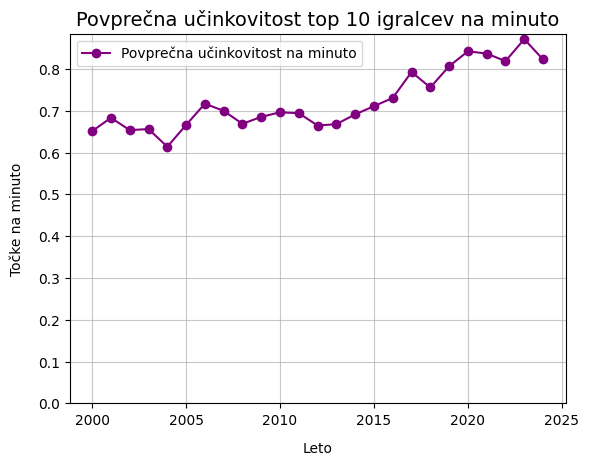

In [ ]:
povprečna_učinkovitost.plot(x="Leto", y="Povprečna učinkovitost na minuto", kind="line", marker="o", color="purple")
plt.title("Povprečna učinkovitost top 10 igralcev na minuto", fontsize=14)
plt.xlabel("Leto", labelpad=10)
plt.ylabel("Točke na minuto", labelpad=10)
plt.ylim(0)
plt.grid(True, alpha=0.7)
plt.show()

<span style="font-family:Times New Roman; font-size:15px;">

### 4. 2. Najbolj učinkovit igralec

Zanimalo me je tudi, kateri igralec je bil najbolj učinkovit pri doseganju točk zadnjih 25 letih. Pri izračunu sem si pomagala s prejšnjo kodo povprečne učinkovitost igralcev na minuto igre.

</span>

In [107]:
top10_najboljših = (
    tabela_podatkov.sort_values(by="točke_na_minuto", ascending=False)
        .drop_duplicates(subset="Igralec")   #vzamem samo najboljšo sezono vsakega igralca
        .reset_index()
        .head(10)[["Igralec", "točke_na_minuto", "MP", "PTS"]]
)

top10_najboljših = top10_najboljših.rename(columns={
    "MP": "Odigrane minute",
    "PTS": "Dosežene točke"
})

top10_najboljših

,Igralec,točke_na_minuto,Odigrane minute,Dosežene točke
0,Naz Mitrou-Long,3.000000,1.0,3.0
1,Zhou Qi,2.000000,1.0,2.0
2,DeAndre Liggins,2.000000,1.0,2.0
3,Ahmad Caver,2.000000,1.0,2.0
4,Jackie Butler,1.941176,1.7,3.3
5,Gerald Green,1.500000,4.0,6.0
6,Jimmer Fredette,1.400000,2.5,3.5
7,Izaiah Brockington,1.333333,3.0,4.0
8,Udonis Haslem,1.333333,3.0,4.0
9,Marcus Williams,1.333333,1.5,2.0


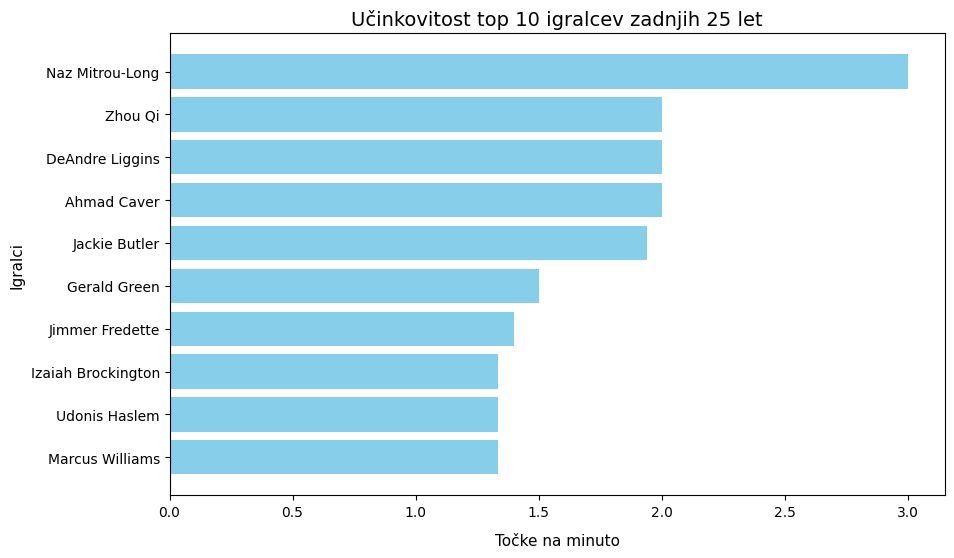

In [108]:
top10_najboljših = top10_najboljših[["Igralec", "točke_na_minuto"]]
# top10_najboljših["točke_na_minuto"] = pd.to_numeric(top10_najboljših["točke_na_minuto"], errors="coerce")

plt.figure(figsize=(10, 6))
bars = plt.barh(top10_najboljših["Igralec"], top10_najboljših["točke_na_minuto"], color="skyblue")
# top10_najboljših.plot(x="točke_na_minuto", y="Igralec", kind="bar", color="lightblue")
# top10_najboljših.dtypes
plt.title("Učinkovitost top 10 igralcev zadnjih 25 let", fontsize=14)
plt.gca().invert_yaxis()   # urejenost od največje vrednosti do najmanjše
plt.xlabel("Točke na minuto", fontsize=11, labelpad=10)
plt.ylabel("Igralci", fontsize=11)
plt.show()

<span style="font-family:Times New Roman; font-size:15px;">

### Ugotovitve

V prvem grafu je prikazano gibanje povprečne učinkovitosti vseh igralcev lige NBA skozi vse sezone. Učinkovitost je izražena v točkah na minuto igranja. Povprečna vrednost se giblje med 0,6 in 0,9 točke na minuto in kaže postopno rast v obdobju 25 let. Opazimo, da ni velikih nihanj, kar kaže na relativno stabilen trend učinkovitosti igralcev skozi čas.

Drugi graf prikazuje deset igralcev, ki so glede na delež doseženih točk na minuto igranja statistično najbolj učinkoviti. Vendar je ta metoda nerelavantna za merjenje resnične učinkovitosti, saj lahko igralec, ki je odigral le eno minuto in dosegel nekaj točk, izpade kot najbolj učinkovit. Za smiselno oceno učinkovitosti je potrebno upoštevati dovolj reprezentativno število odigranih minut, da se izogne ekstremnim vrednostim in nerealnim zaključkom.

</span>

<span style="font-family:Times New Roman; font-size:15px;">

## 5. Top deset igralcev v vseh sezonah

### 5.1. Dosežene točke

V zadnjem sklopu analize sem želela ugotoviti kdo so najboljših deset strelcev v ligi NBA skozi vseh 25 sezon ter določiti, kdo je med njimi najboljši in kdo najslabši po številu doseženih točk.

</span>



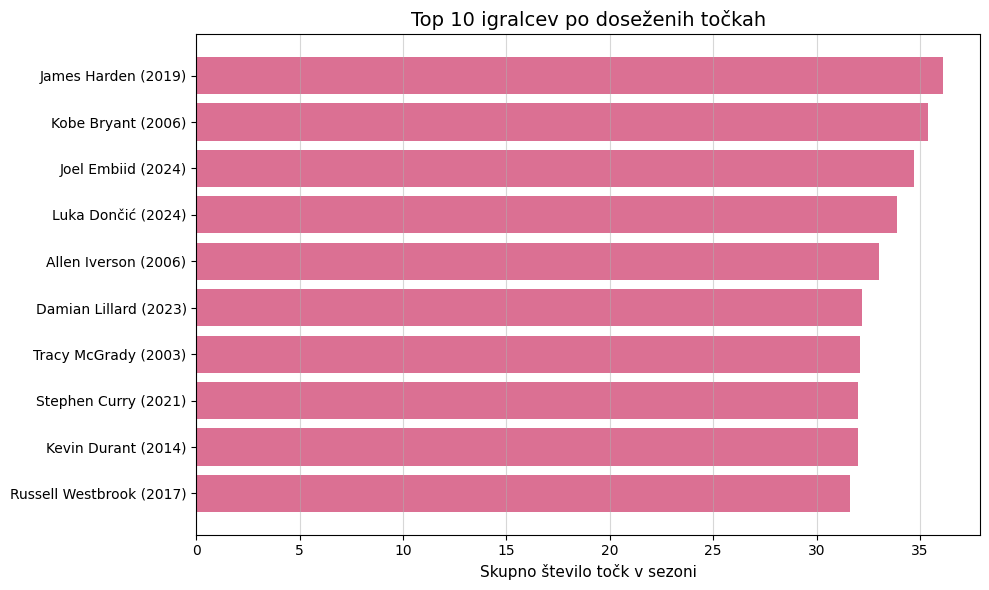

Največje število točk:
Naziv    James Harden (2019)
PTS                     36.1
Name: 0, dtype: object.
Najmanjše število točk:
Naziv    Russell Westbrook (2017)
PTS                          31.6
Name: 12, dtype: object.


In [109]:
top10_pts = tabela_podatkov.sort_values(by="PTS", ascending=False)
top10_pts = top10_pts.reset_index()
top10_pts = top10_pts.drop_duplicates(subset=["Igralec"]).head(10)
top10_pts["Naziv"]  = top10_pts["Igralec"] + " (" + top10_pts["Leto"].astype(str) + ")"

plt.figure(figsize=(10, 6))
bars = plt.barh(top10_pts["Naziv"], top10_pts["PTS"], color="palevioletred")
plt.title("Top 10 igralcev po doseženih točkah", fontsize=14)
plt.xlabel("Skupno število točk v sezoni", fontsize=11)
plt.gca().invert_yaxis()   #največje naj bo na vrhu
plt.grid(axis="x", alpha=0.5)
    
plt.tight_layout()
plt.show()

top10_pts = top10_pts[["Naziv", "PTS"]]
največ_točk = top10_pts.iloc[0]
najmanj_točk = top10_pts.iloc[-1]

print(f"Največje število točk:\n{največ_točk}.")
print(f"Najmanjše število točk:\n{najmanj_točk}.")



<span style="font-family:Times New Roman; font-size:15px;">

### 5.2. Ekipe

Poleg individualnih dosežkov sem želela preveriti, katere ekipe imajo največ igralcev med top 10 strelci v vseh sezonah. Pristop temelji na pregledu igralcev, ki so se uvrstili med najboljših deset v posamezni sezoni, ter naštevanju ekip, ki jih ti igralci predstavljajo. Rezultati omogočajo vpogled v to, katere ekipe uspešno razvijajo ali privabljajo visoko produktivne igralce, kar je pomemben dejavnik pri analizi strateške moči ekip v ligi NBA.

</span>

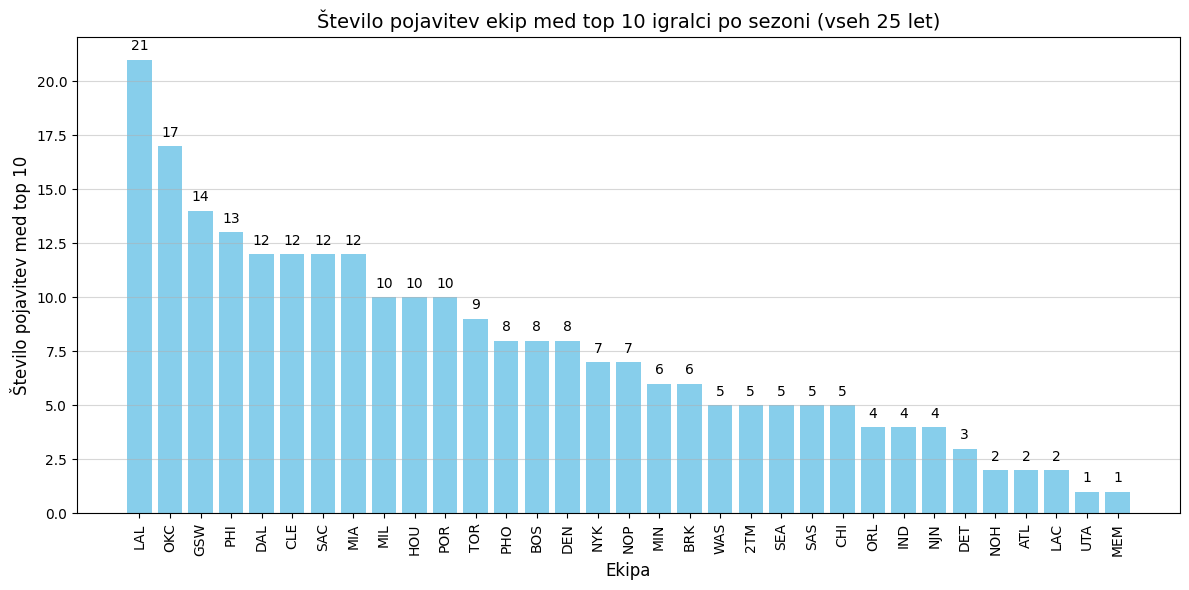

In [112]:
top10_po_letih = (
    tabela_podatkov.sort_values(by=["Leto", "PTS"], ascending=[True, False])
        .groupby("Leto")
        .head(10)
)

št_ekip = top10_po_letih["Ekipa"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(št_ekip.index, št_ekip.values, color="skyblue")
plt.title("Število pojavitev ekip med top 10 igralci po sezoni (vseh 25 let)", fontsize=14)
plt.xlabel("Ekipa", fontsize=12)
plt.ylabel("Število pojavitev med top 10", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.5)

for bar in bars:     #dodaj številke na vrh stolpcev
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, int(yval), ha="center", va="bottom")

plt.tight_layout()
plt.show()

<span style="font-family:Times New Roman; font-size:15px;">

### 5.3. Pozicije

V nadaljevanju sem želela analizirati, kateri položaji igralcev so najbolj zastopani med top 10 strelci skozi vseh 25 sezon. Razvrstitev po pozicijah (na primer branilec, krilo, center) omogoča vpogled v to, katera vloga na igrišču najbolj prispeva k doseganju točk.

</span>

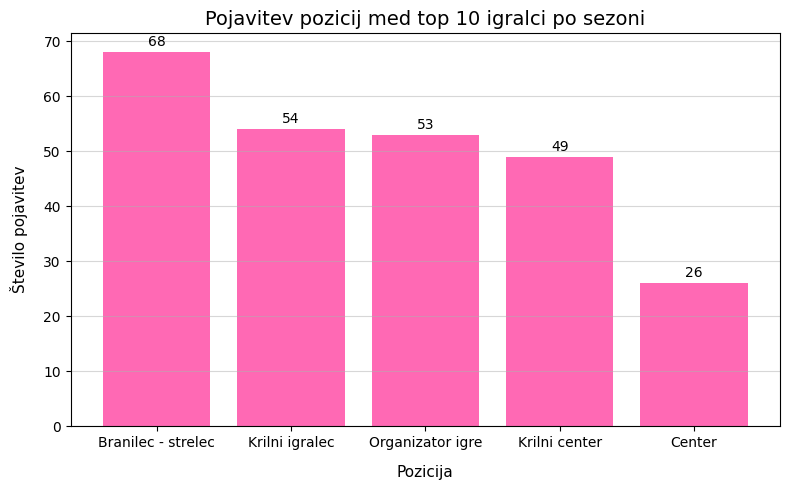

In [111]:
top10_pozicije = (
    tabela_podatkov.sort_values(by=["Leto", "PTS"], ascending=[True, False])
    .groupby("Leto")
    .head(10)
)

št_pozicij = top10_pozicije["Poz"].value_counts()

prevodi= {
    "PG": "Organizator igre",
    "SG": "Branilec - strelec",
    "SF": "Krilni igralec",
    "PF": "Krilni center",
    "C": "Center"
}

št_pozicij.index = št_pozicij.index.map(lambda x: prevodi.get(x))

plt.figure(figsize=(8, 5))
bars = plt.bar(št_pozicij.index, št_pozicij.values, color="hotpink")
plt.title("Pojavitev pozicij med top 10 igralci po sezoni", fontsize=14)
plt.xlabel("Pozicija", fontsize=11, labelpad=11)
plt.ylabel("Število pojavitev", fontsize=11, labelpad=11)
plt.grid(axis="y", alpha=0.5)


for bar in bars:
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### Ugotovitve 

Pri tej analizi sem želela ugotoviti kateri so top 10 igralci z največjim številom točk v vseh sezonah in koliko točk so dosegli. Zanimalo me je tudi število pojavitev ekip in pozicij top 10 igralcev vsako sezono. Ugotovila sem, da med najboljšimi strelci prevladuje James Harden, sledi mu Kobe Bryant. Med top 10 igralcev vsako sezono pa močno prevladuje ekipa Dallas, pri pozicijah pa Branilec - strelec. Zato je zanimivo, da je večina igralcev z največjim številom točk v vseh sezonah v vlogi organizatorja igre in ne branilec_strelec.


Analiza je pokazala, da so nekatere ekipe pogosteje zastopane, kar kaže na njihovo konzistentno moč in kakovost igralcev skozi čas.

## 6. Zaključek

Moje glavno področje preučevanje v analiza je bilo deset najboljših igralcev.  